# 📌ACTIVIDAD 2: ÁRBOLES DE DECISIÓN.

 Crea el notebook saa-u03-p02-a2-<tus_iniciales>.ipynb donde completar la actividad.
Comenzamos probando diferentes clasificadores sobre unos datos separables linealmente (con un
hiperplano).

## CLASIFICADORES BASADOS EN ÁRBOLES DE DECISIÓN

 Carga el mismo fichero Social_Network_Ads.csv de la actividad 1 en un DataFrame de pandas.

 a) Define el target y como compra y edad, salario como  las predictoras X.  Divide en train y
test dando un 30% de los datos para test, usando semilla aleatoria formada por la cantidad de
letras de tu nombre y apellidos (en mi caso sería 449 porque "Jose" tiene 4 letras, "Rosa" tiene
otras 4 letras y "Rodríguez" tiene 9 letras). Intenta que la partición sea homogénea.

 b) Crea un clasificador DecisionTreeClassifier llamado clf_1 con random_state a tu semilla.
Debes validarlo impriendo la accuracy tanto en el conjunto de entrenamiento como en el de test.
Imprime además el informe de clasificación del test. Después crea una figura de 25 de ancho y
20 de alto y dibuja el árbol con plot_tree() indicando class_names y filled=True. Responde a
estas preguntas:

 • ¿Cuál es el algoritmo o criterio de particionamiento que usa por defecto el árbol?

 • ¿Tiene overfitting el modelo que has entrenado?

 c) Mira en la unidad y adapta algún
código de ejemplo para crear la función
frontera_decision_tree(arbol,X,y)
que crea una malla de 100x100 puntos
(desde el mínimo al máximo de los
datos de las dos primeras dimensiones
de X) y dibuja la superficie de decisión
creada por un árbol previamente
entrenado que viene como argumento
de la función. Luego sitúa los datos de
cada muestra con un color asociado a su
clase (el árbol guarda la cantidad de
características en arbol.n_classes_ y
sus valores en arbol.classes_) en la
superficie (cada clase con su propio
color. Puedes usar un mapa de colores
cargado
como
cmap=plt.get_cmap("nombre") donde
puedes indicar "tab10", "tab20", "hsv",
"Set1", "nipy_spectral"
que se
pueden interpolar: color=cmap(i/arbol.n_classes_).
 Luego creas una figura de tamaño (9,11) y haces una llamada pasando el X_test, y_test y
aparece una figura similar a la derecha que es el resultado de usar X_train, y_train.

 d) Crea un nuevo árbol DecisionTreeClassifier llamado clf_2 con random_state a tu semilla
y criterio de división 'entropy' y repite las mismas operaciones del apartado b) incluido el
dibujo del árbol y el dibujo de la llamada a la frontera de decisión. Responde:

 • ¿Cambia la estructura del árbol?

 • ¿Cambian las fronteras?

 • Los valores del accuracy sugiere cambios en overfitting/underfitting

 e) Crea un nuevo árbol DecisionTreeClassifier llamado clf_3 con random_state a tu semilla
y criterio de división 'log_loss' y repite las mismas operaciones del apartado b) incluido el
dibujo del árbol y el dibujo de la llamada a la frontera de decisión. Responde:

 • ¿Cambia la estructura del árbol?

• ¿Cambian las fronteras?

 • Los valores del accuracy sugiere cambios en overfitting/underfitting

 ENTREGA 4:

 a) Completa los apartados entregando código, resultados de ejecución y respuestas a las
preguntas.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Cargar los datos
df = pd.read_csv("../U03_Recursos/U03_P02_Clasificacion/Social_Network_Ads.csv")

# Selección de variables predictoras y target
X = df[["edad", "salario"]]
y = df["compra"]

# Semilla: número de letras de nombre y apellidos (ejemplo: 13)
semilla = 13

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=semilla, stratify=y
)

Train Accuracy: 0.9964285714285714
Test Accuracy: 0.825
Informe de clasificación (test):
               precision    recall  f1-score   support

           0       0.88      0.84      0.86        77
           1       0.74      0.79      0.76        43

    accuracy                           0.82       120
   macro avg       0.81      0.82      0.81       120
weighted avg       0.83      0.82      0.83       120



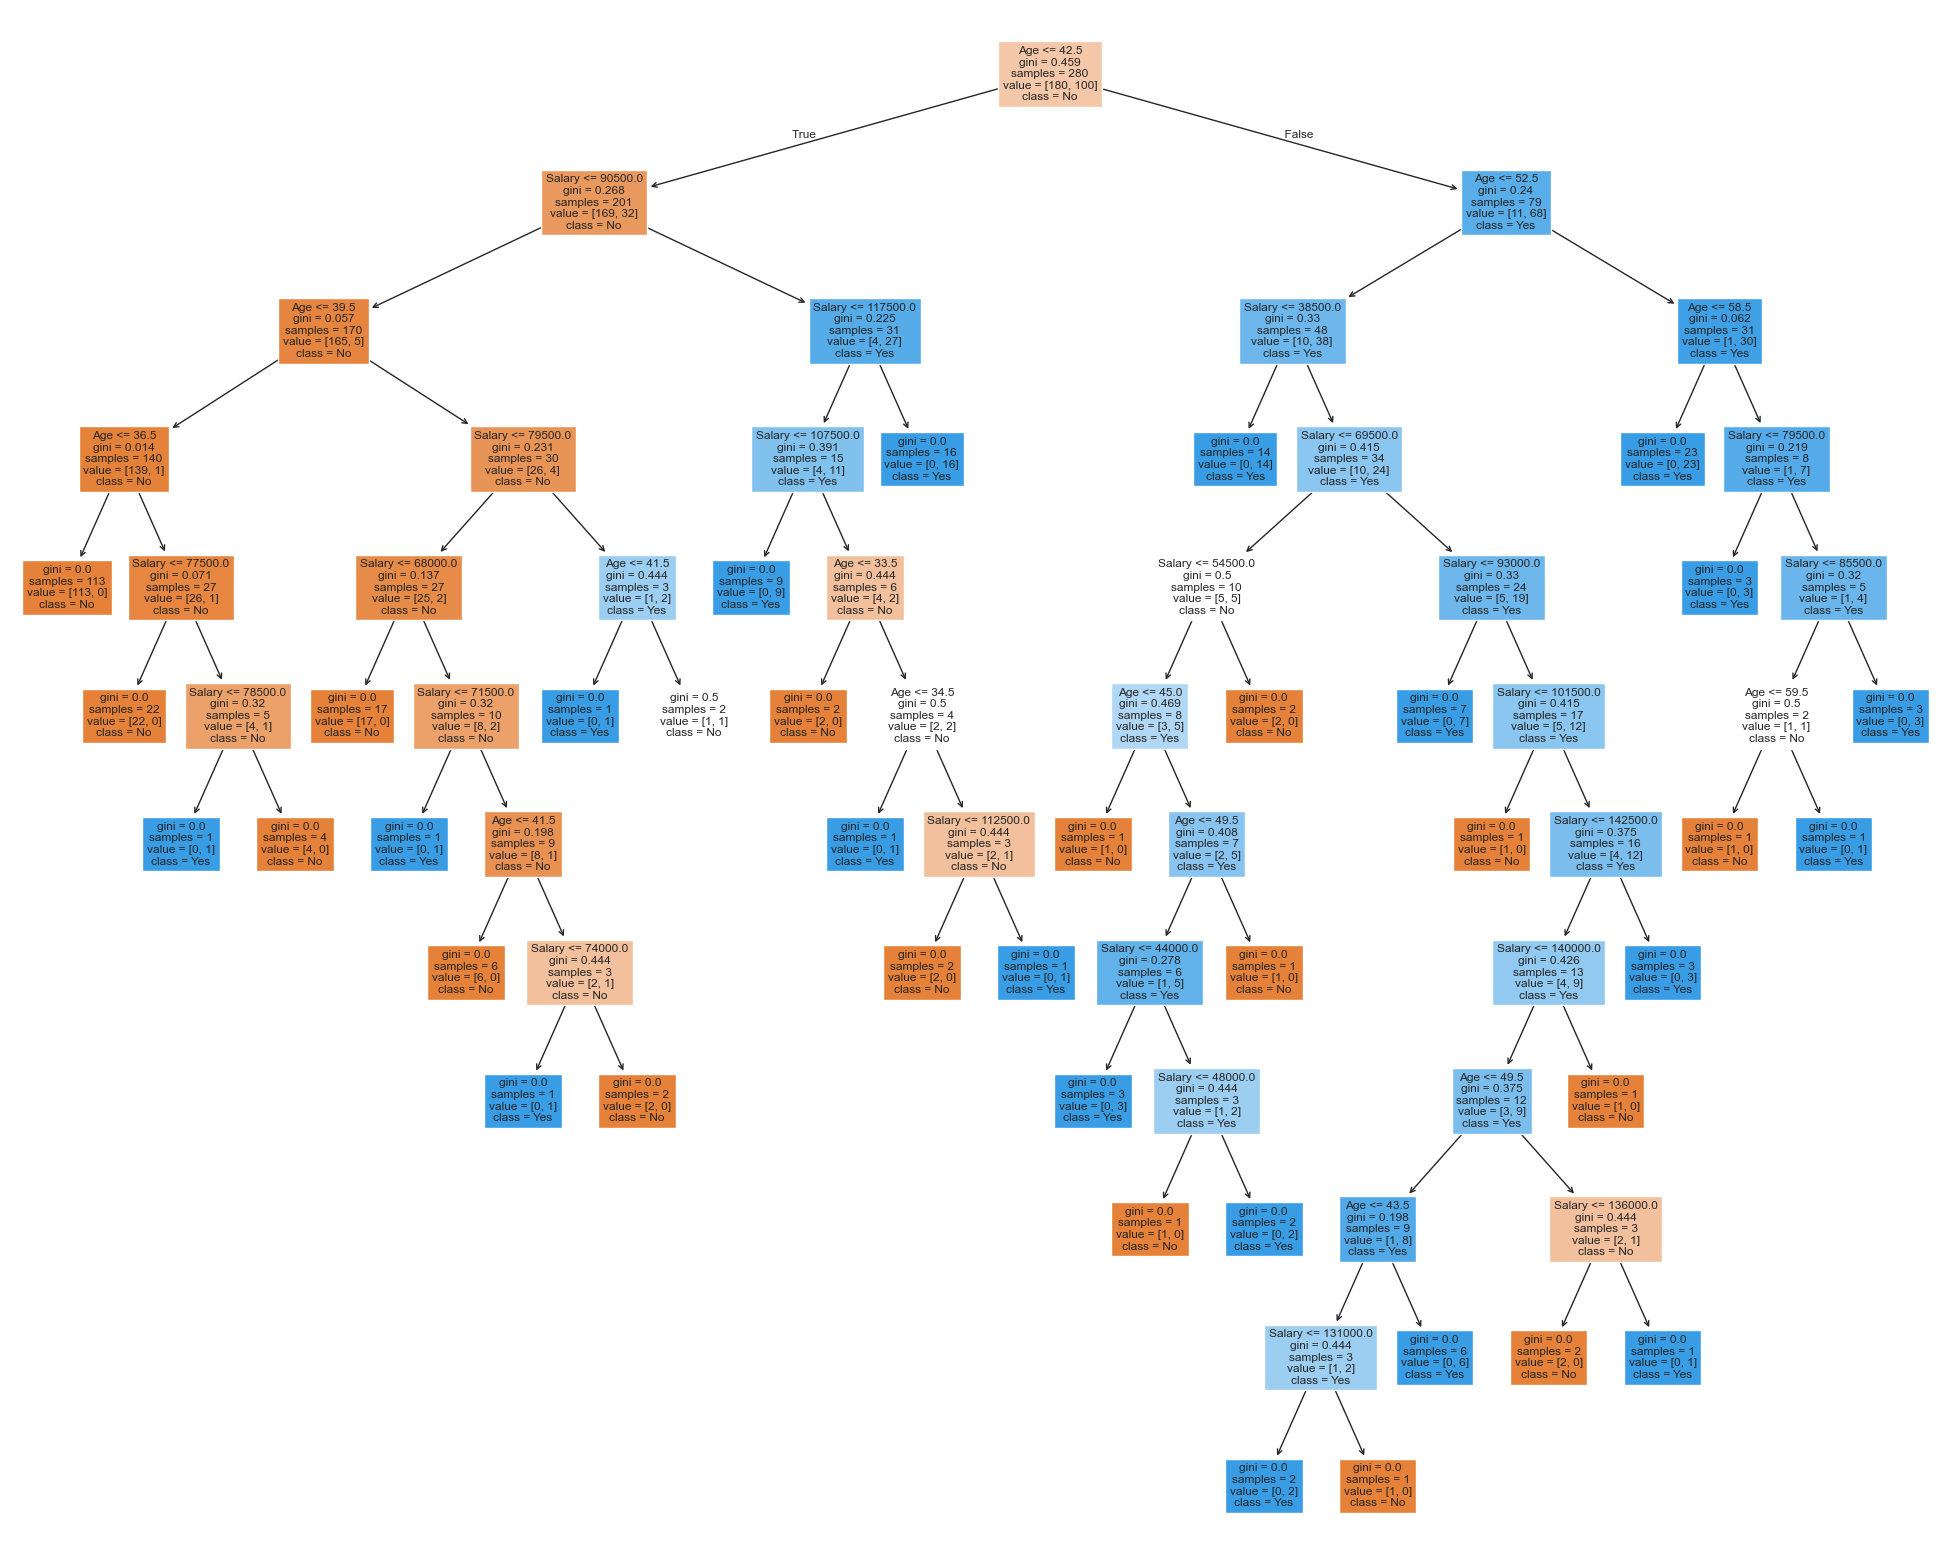

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Árbol 1
clf_1 = DecisionTreeClassifier(random_state=semilla)
clf_1.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_train = clf_1.predict(X_train)
y_pred_test = clf_1.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Informe de clasificación (test):\n", classification_report(y_test, y_pred_test))

# Dibujar el árbol
plt.figure(figsize=(25, 20))
plot_tree(clf_1, feature_names=["Age", "Salary"], class_names=["No", "Yes"], filled=True)
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def frontera_decision_tree(arbol, X, y, title="Frontera de decisión"):
    cmap = plt.get_cmap("Set1")
    h = 5  # Tamaño de paso ajustado para no saturar la memoria

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 5000, X.iloc[:, 1].max() + 5000

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    puntos = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
    Z = arbol.predict(puntos)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(9, 11))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)

    for i, color in zip(arbol.classes_, [cmap(i / arbol.n_classes_) for i in arbol.classes_]):
        idx = y == i
        plt.scatter(X.loc[idx, X.columns[0]], X.loc[idx, X.columns[1]], label=f"Clase {i}", c=[color], edgecolor='k')

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(title)
    plt.legend()
    plt.show()


Train Accuracy: 0.9964285714285714
Test Accuracy: 0.85
Informe clasificación (entropy):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        77
           1       0.78      0.81      0.80        43

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



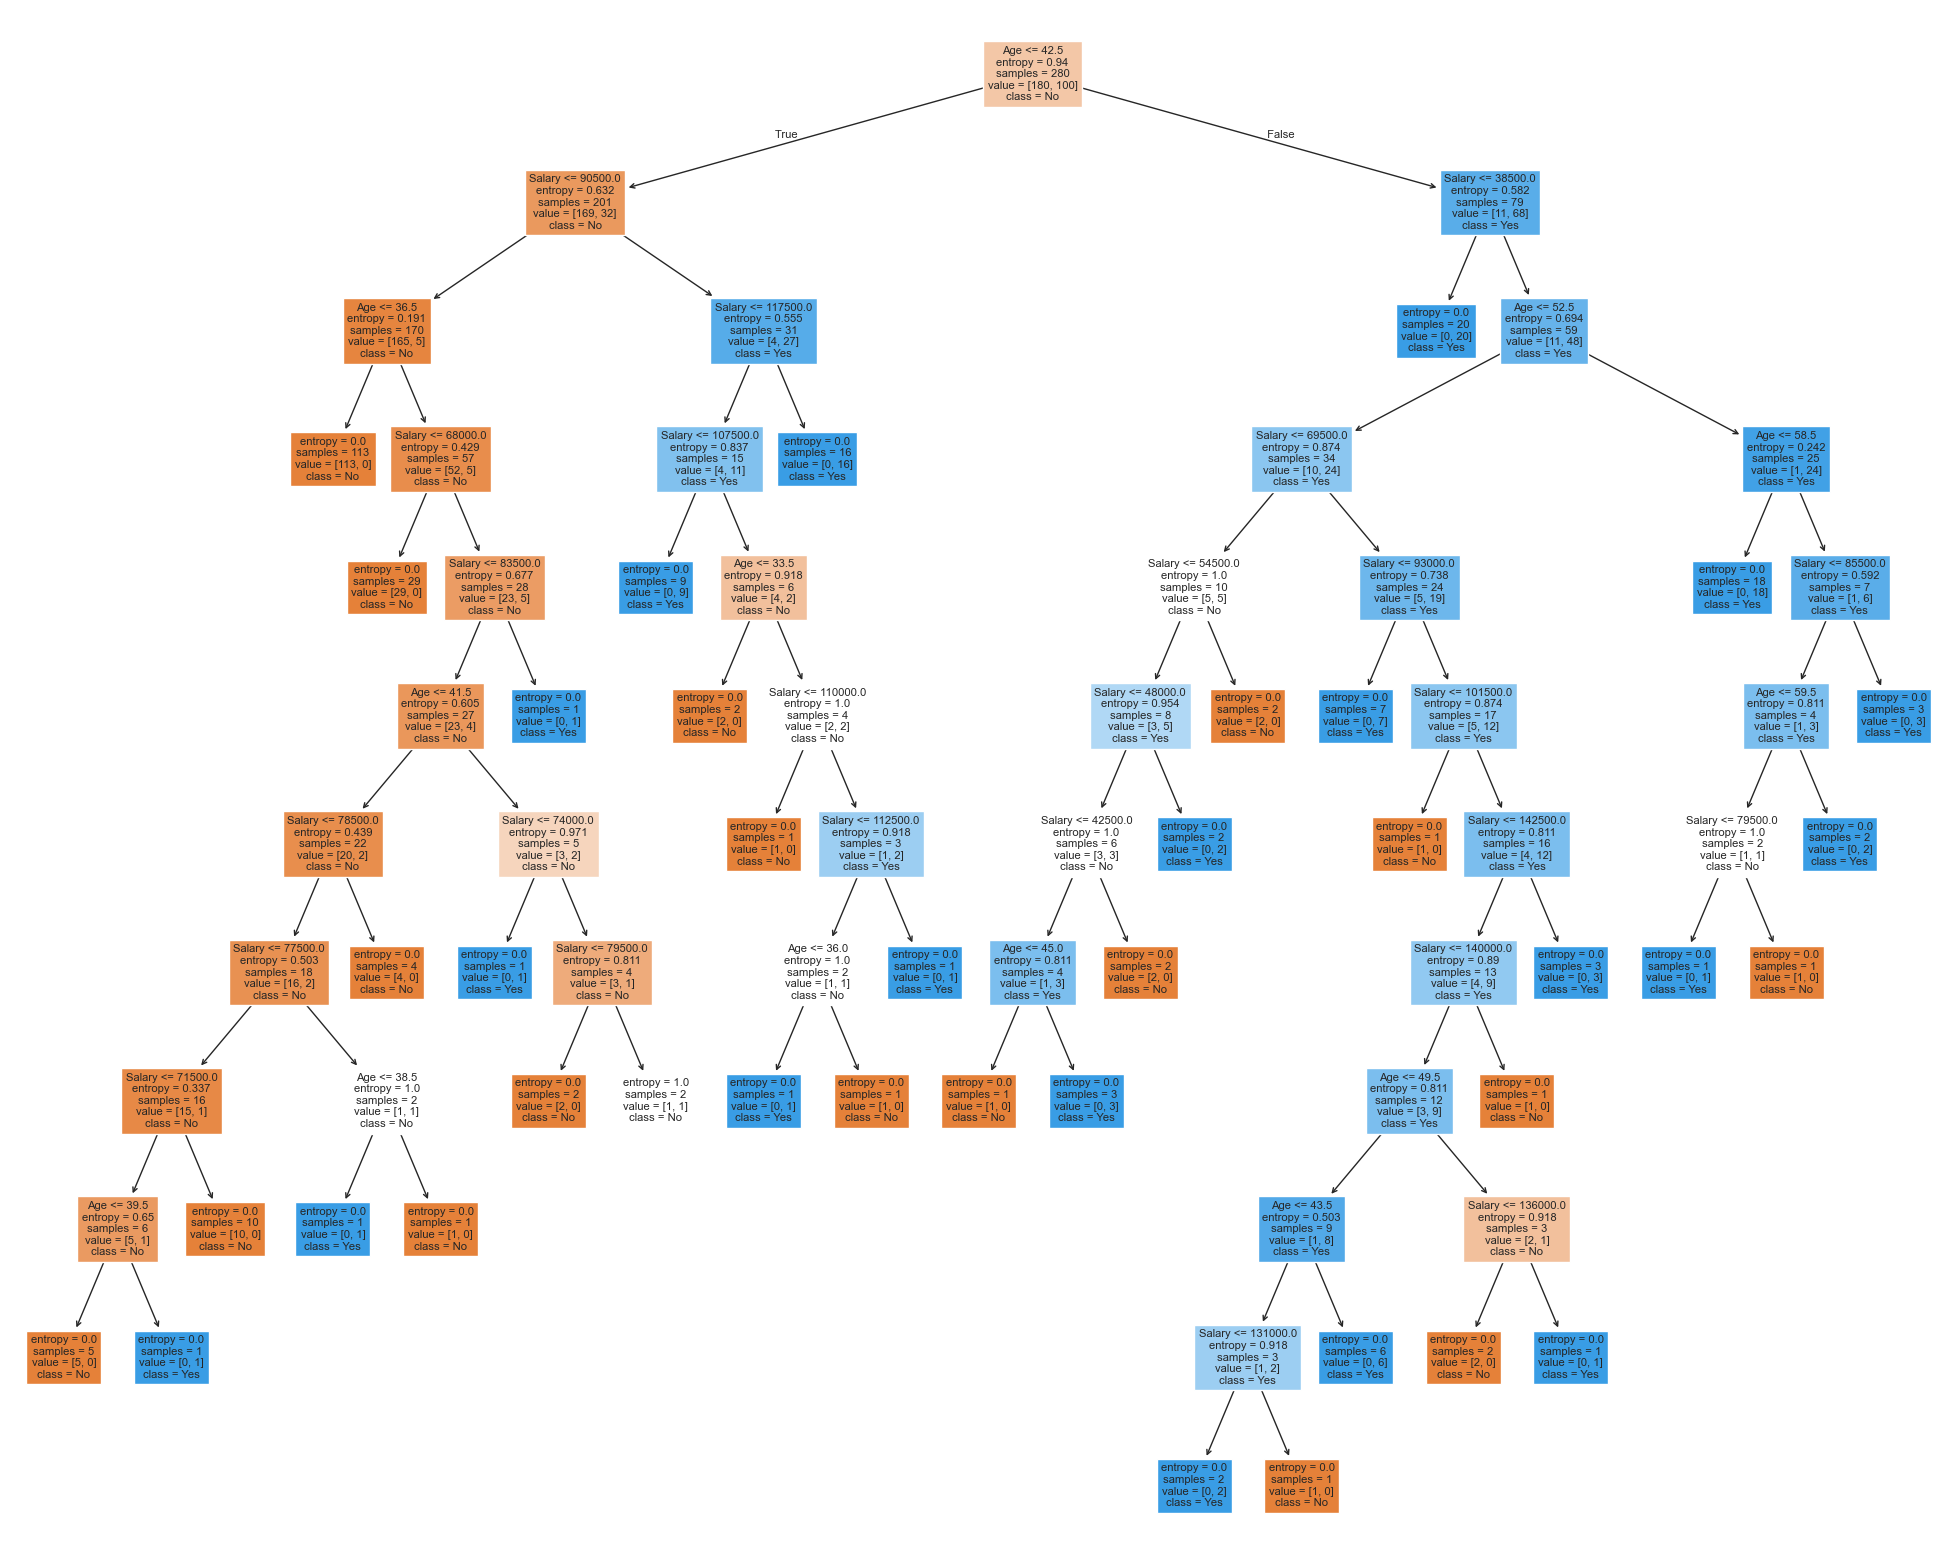

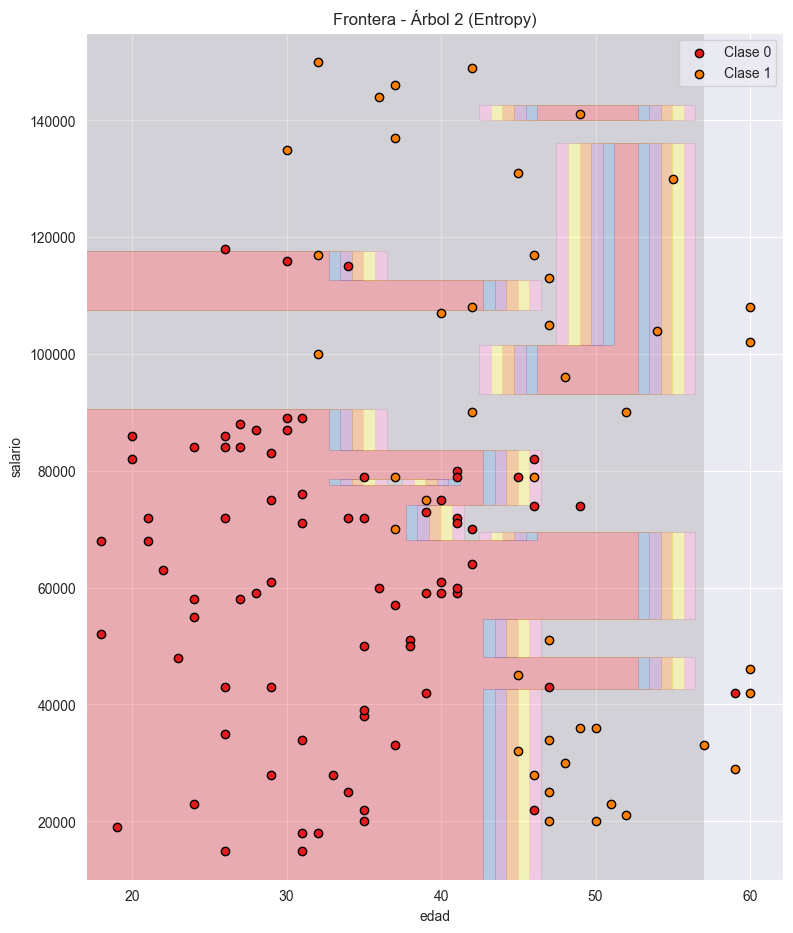

In [21]:
clf_2 = DecisionTreeClassifier(criterion="entropy", random_state=semilla)
clf_2.fit(X_train, y_train)

print("Train Accuracy:", accuracy_score(y_train, clf_2.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, clf_2.predict(X_test)))
print("Informe clasificación (entropy):\n", classification_report(y_test, clf_2.predict(X_test)))

# Árbol
plt.figure(figsize=(25, 20))
plot_tree(clf_2, feature_names=["Age", "Salary"], class_names=["No", "Yes"], filled=True)
plt.show()

# Frontera
frontera_decision_tree(clf_2, X_test, y_test, title="Frontera - Árbol 2 (Entropy)")


Train Accuracy: 0.9964285714285714
Test Accuracy: 0.85
Informe clasificación (log_loss):
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        77
           1       0.78      0.81      0.80        43

    accuracy                           0.85       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.85      0.85      0.85       120



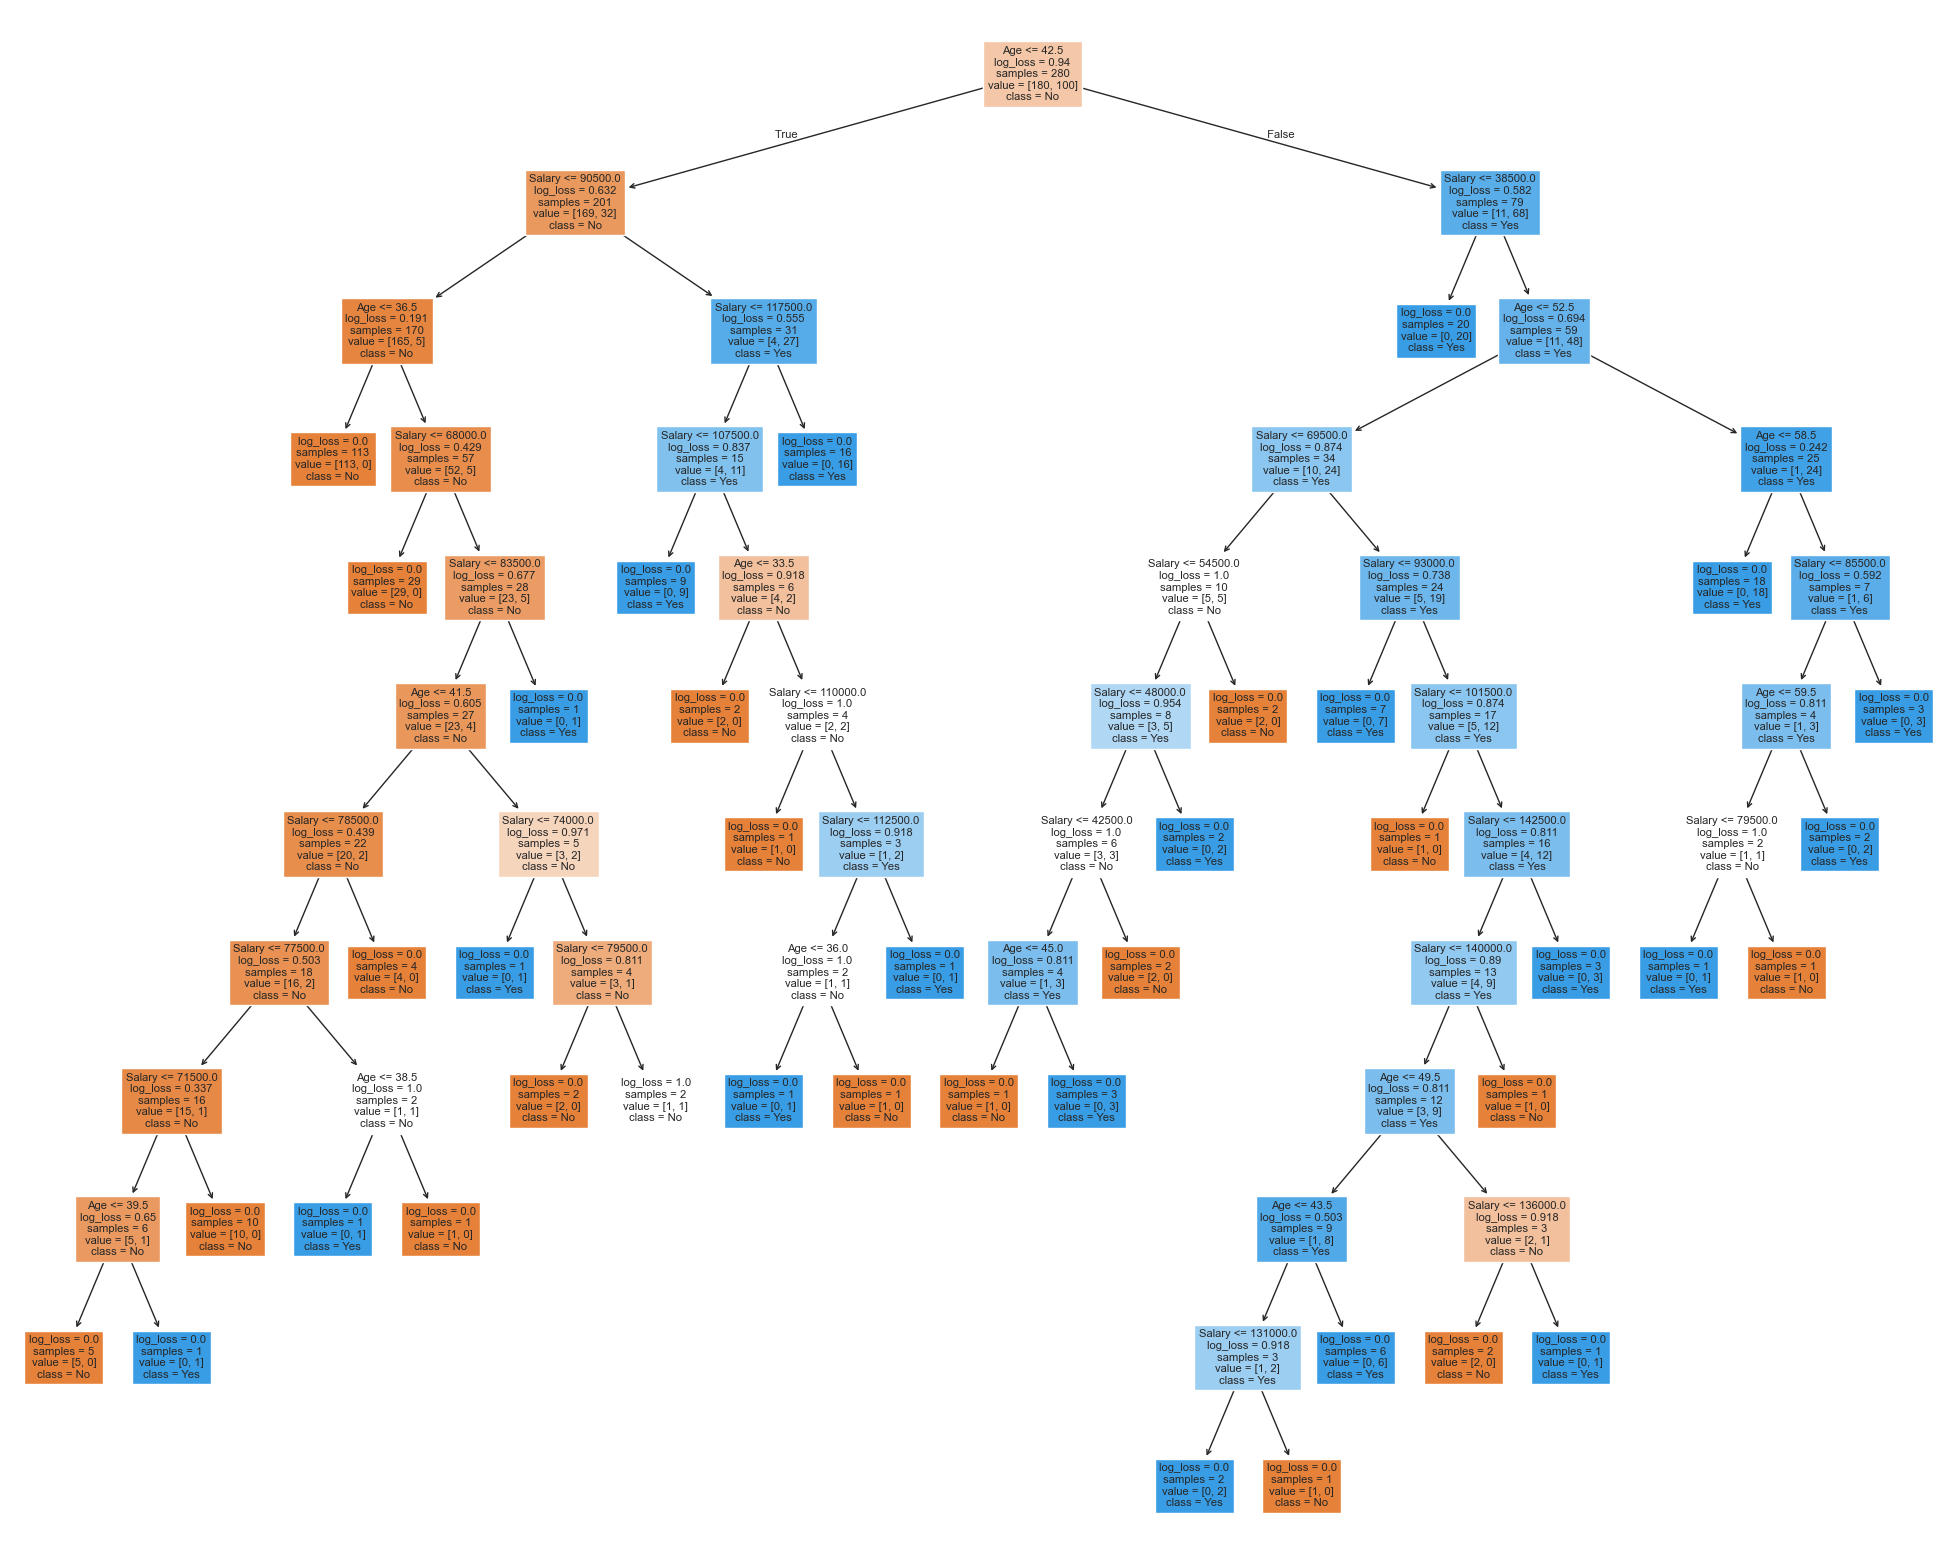

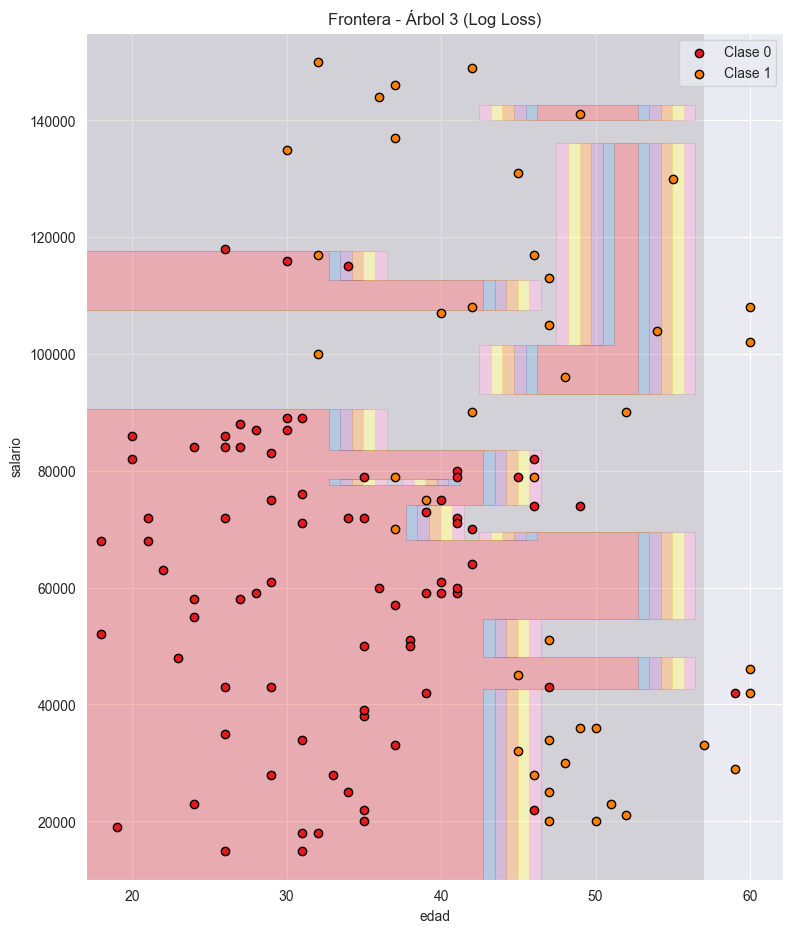

In [22]:
clf_3 = DecisionTreeClassifier(criterion="log_loss", random_state=semilla)
clf_3.fit(X_train, y_train)

print("Train Accuracy:", accuracy_score(y_train, clf_3.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, clf_3.predict(X_test)))
print("Informe clasificación (log_loss):\n", classification_report(y_test, clf_3.predict(X_test)))

# Árbol
plt.figure(figsize=(25, 20))
plot_tree(clf_3, feature_names=["Age", "Salary"], class_names=["No", "Yes"], filled=True)
plt.show()

# Frontera
frontera_decision_tree(clf_3, X_test, y_test, title="Frontera - Árbol 3 (Log Loss)")


##  MÉTODOS PARA REDUCIR EL OVERFITTING

Los árboles de decisión tienden a sobreajustar si se dejan crecer sin restricciones. Vamos a probar
algunos métodos para prevenir o reducir este resultado:

 f) Limitar la profundidad del árbol (max_depth) o la cantidad de hojas finales del árbol
(max_leaf): reduce la complejidad evitando que el árbol se expanda demasiado. Copia el
código del apartado b) y cambia el nombre del clasificador por clf_4 y le añades el
hiperparámetro max_depth=<profundidad_anterior – 4>. Muestra accuracy en train y test, el
informe de clasificación, dibuja el árbol y las fronteras de decisión en el test. Responde:
 • ¿Baja el score? ¿Baja el overfitting? ¿El nuevo árbol es más sencillo o más complejo?
¿Las fronteras de decisión se fijan más en los detalles y el ruido? (tienen zonas más
irregulares y pequeñas) o ¿tienen menos zonas y con líneas más suaves?

g) Limitar número mínimo de muestras por nodo (min_samples_split y min_samples_leaf):
reduce la complejidad evitando que el árbol tenga ramas con poca cantidad de muestras. Copia
el código del apartado f) y cambia el nombre del clasificador por clf_5 y quitas el
hiperparámetro max_depth y añades los hiperparámetros min_samples_split=10 y
min_samples_leaf=5. Muestra accuracy en train y test, el informe de clasificación, dibuja el
árbol y las fronteras de decisión en el test. Responde:

 • ¿Baja el score? ¿Baja el overfitting? ¿El nuevo árbol es más sencillo o más complejo?
¿fronteras de decisión irregulares más suaves?

h) Limitar número de divisiones (min_impurity_decrease): reduce la complejidad evitando
hacer divisiones que no supongan una mejora importante en la capacidad de clasificar. El
significado de "mejora importante" se define con el hiperparámetro. Copia el código del
apartado f) y cambia el nombre del clasificador por clf_6 y dejas solamente el hiperparámetro
min_impurity_decrease a un valor que reduzca el overfitting pero no baje de 95 el puntaje.
Muestra accuracy en train y test, el informe de clasificación, dibuja el árbol y las fronteras de
decisión en el test. Responde:

 • ¿Baja el score? ¿Baja el overfitting? ¿El nuevo árbol es más sencillo o más complejo?
¿fronteras de decisión irregulares más suaves?

 i) Usar validación cruzada para combinar restricciones: utiliza un objeto GridSearchCV() con
cv=5 y tu semilla aleatoria que utilice un diccionario donde has definido posibles valores de
max_depth, min_samples_split y min_impurity_decrease y encuentra una buena
combinación de estos 3 hiperparámetos. A continuación copia el código del apartado f) y
cambia el nombre del clasificador por clf_7 pero ahora le asignas el mejor modelo de la grid
search (best_estimator_) y lo entrenas con todos los datos y vlidas. Muestra accuracy en train y test, el informe de clasificación, dibuja el árbol y las fronteras de decisión en el test.

Responde:

 • ¿Baja el score? ¿Baja el overfitting? ¿El nuevo árbol es más sencillo o más complejo?
¿fronteras de decisión irregulares más suaves?

j) Combinar varios modelos: utiliza bagging o boosting para reducir el bias y la varianza de
un solo modelo. Adapta la siguiente estructura y la evalúas en un bucle creando figura con 6
gráficos: la primera fila 3 árboles, la segunda fila 3 fronteras de decisión. Escribe además el
score ent rain y test de cada uno para saber si bajan el overfitting.

ENTREGA 5:
 a) Completa los apartados entregando código, resultados de ejecución y respuestas a las
preguntas.


Accuracy en train: 0.975
Accuracy en test: 0.85
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        77
           1       0.77      0.84      0.80        43

    accuracy                           0.85       120
   macro avg       0.84      0.85      0.84       120
weighted avg       0.85      0.85      0.85       120



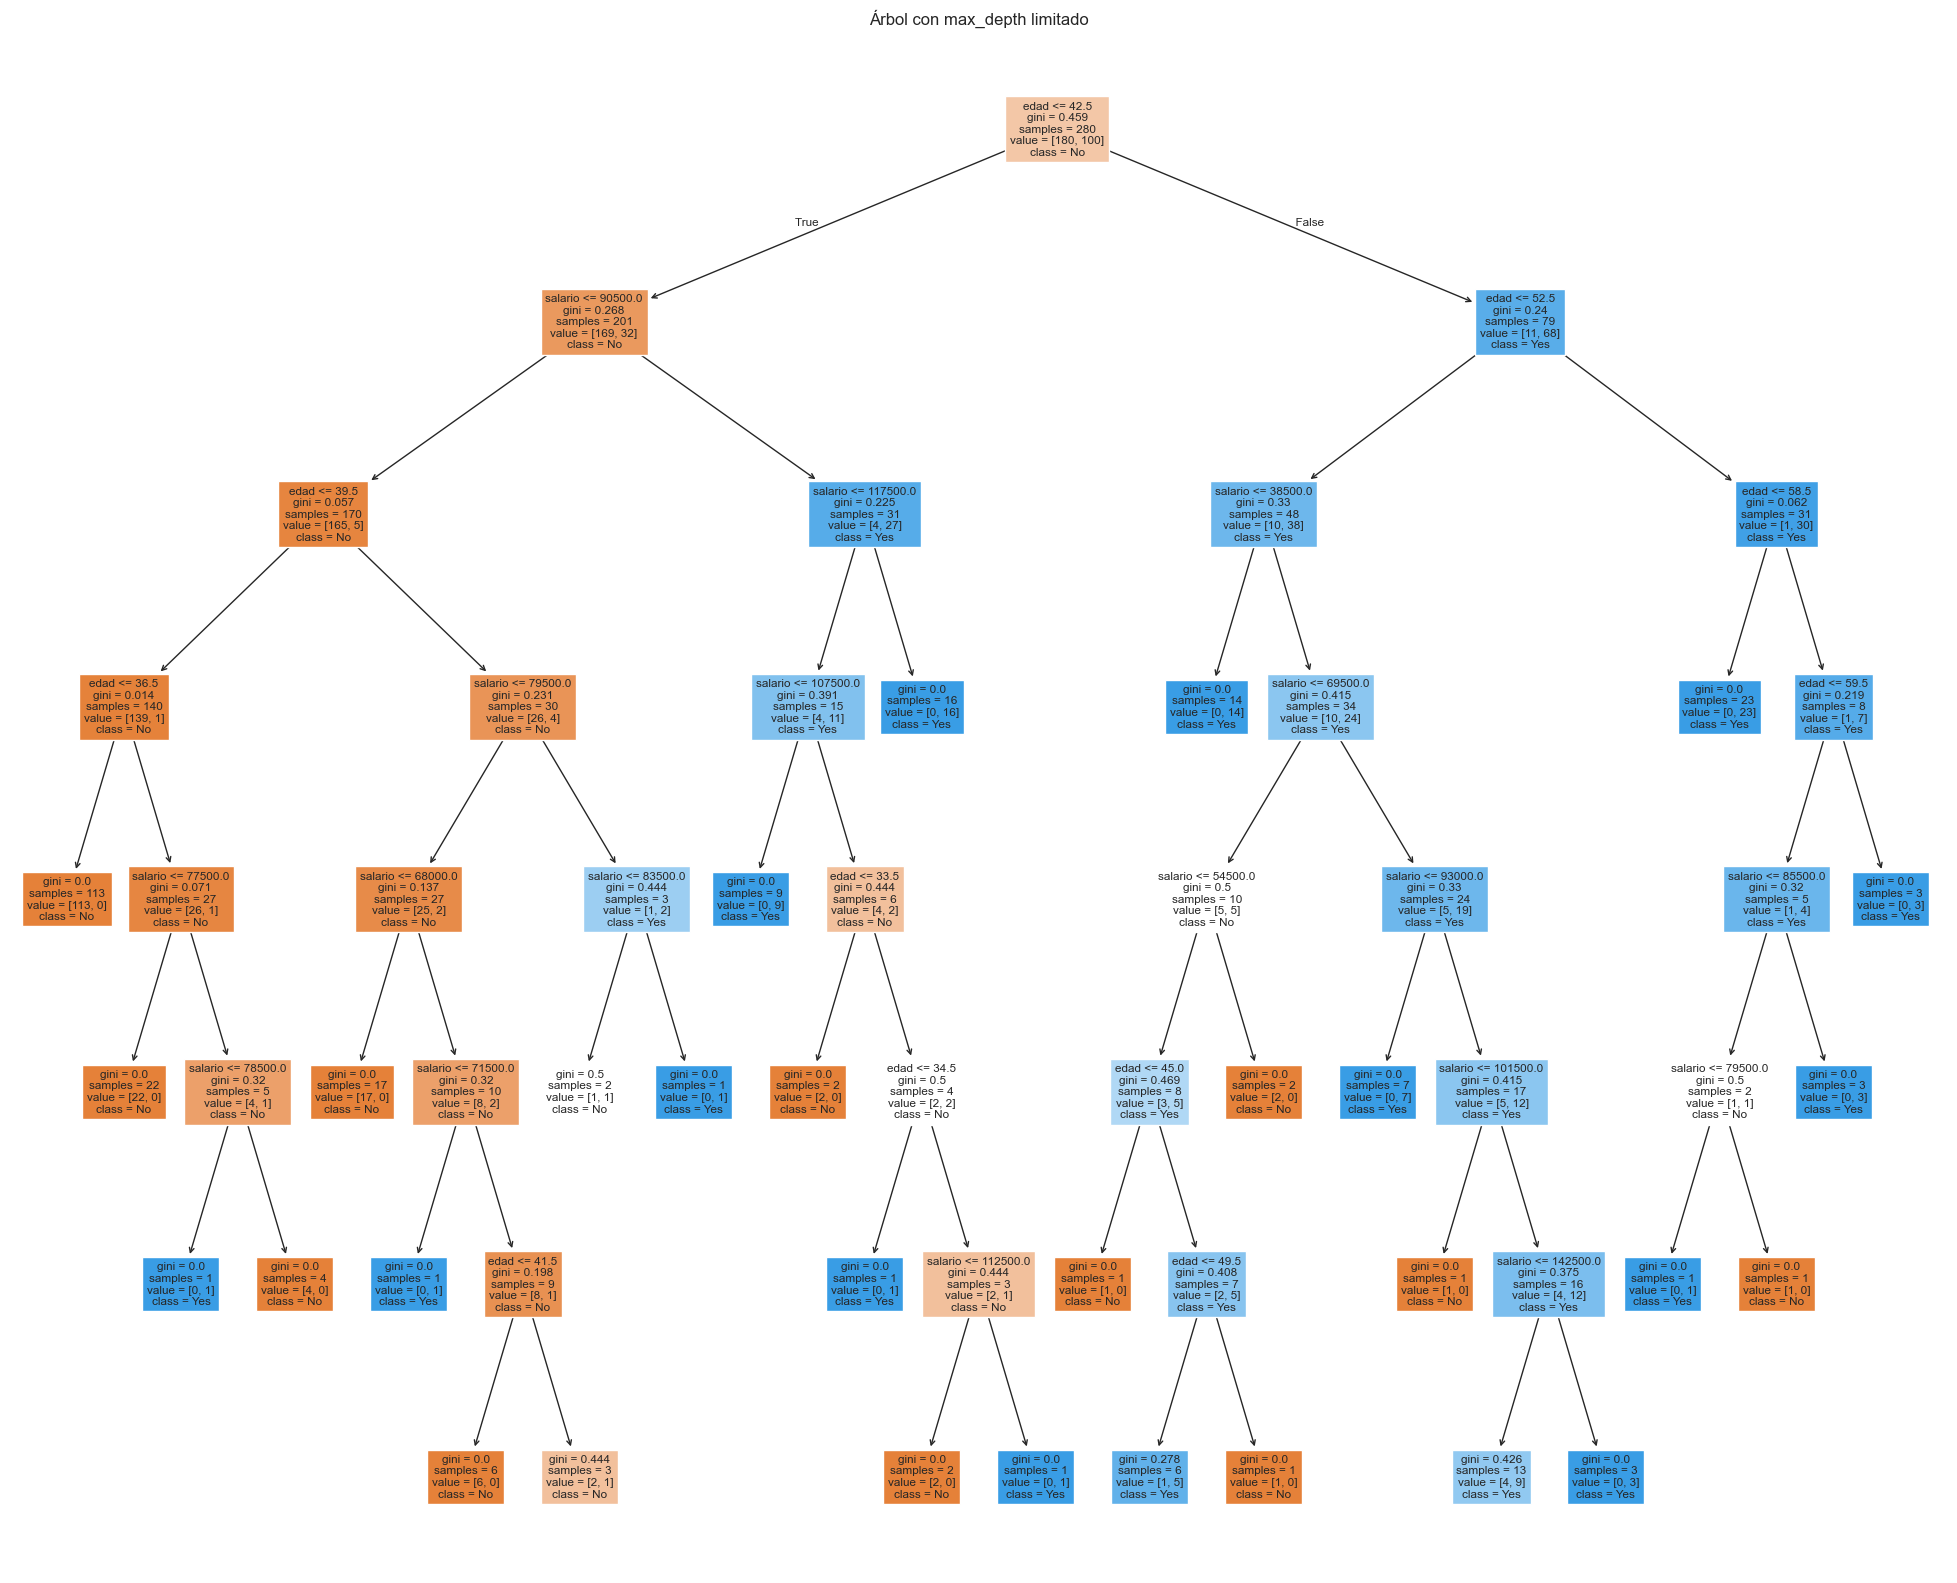

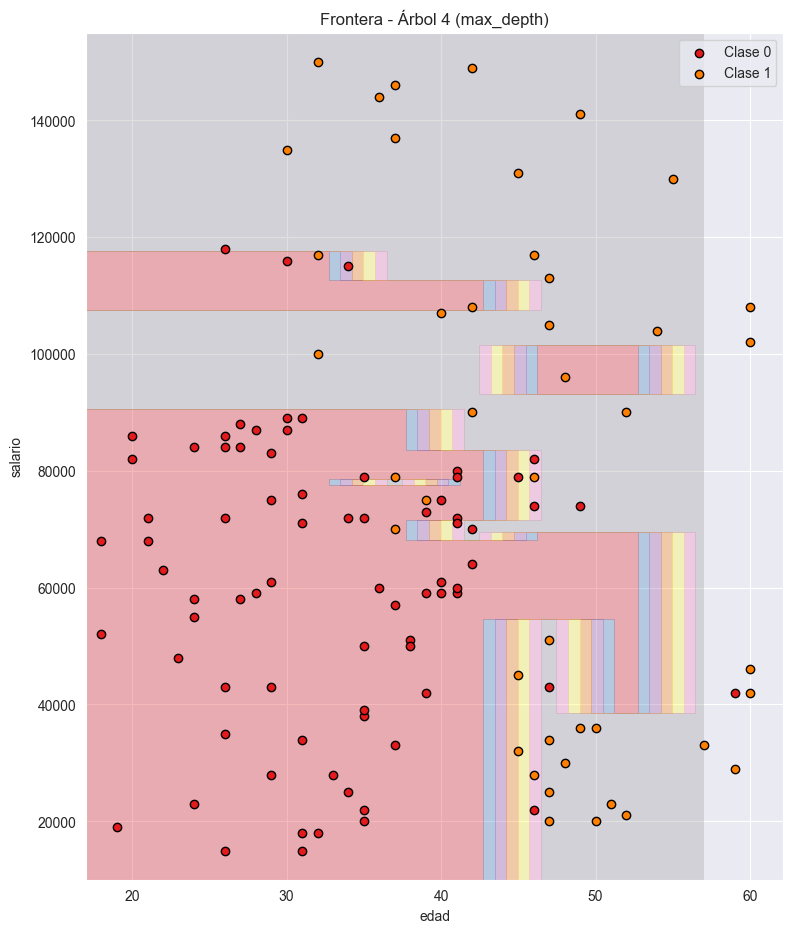

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Árbol con profundidad limitada
max_depth_limit = clf_1.get_depth() - 4
clf_4 = DecisionTreeClassifier(random_state=semilla, max_depth=max_depth_limit)
clf_4.fit(X_train, y_train)

# Predicciones
y_train_pred4 = clf_4.predict(X_train)
y_test_pred4 = clf_4.predict(X_test)

# Evaluación
print("Accuracy en train:", accuracy_score(y_train, y_train_pred4))
print("Accuracy en test:", accuracy_score(y_test, y_test_pred4))
print("Informe de clasificación:\n", classification_report(y_test, y_test_pred4))

# Dibujo del árbol
plt.figure(figsize=(25, 20))
plot_tree(clf_4, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Árbol con max_depth limitado")
plt.show()

# Frontera de decisión
frontera_decision_tree(clf_4, X_test, y_test, title="Frontera - Árbol 4 (max_depth)")


¿Baja el score? Probablemente sí, especialmente en train.

¿Baja el overfitting? Sí, se espera una menor diferencia entre train y test.

¿El nuevo árbol es más sencillo o más complejo? Más sencillo (menos nodos).

¿Las fronteras son más suaves o irregulares? Más suaves, menos adaptadas al ruido.

Accuracy en train: 0.9392857142857143
Accuracy en test: 0.875
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90        77
           1       0.82      0.84      0.83        43

    accuracy                           0.88       120
   macro avg       0.86      0.87      0.86       120
weighted avg       0.88      0.88      0.88       120



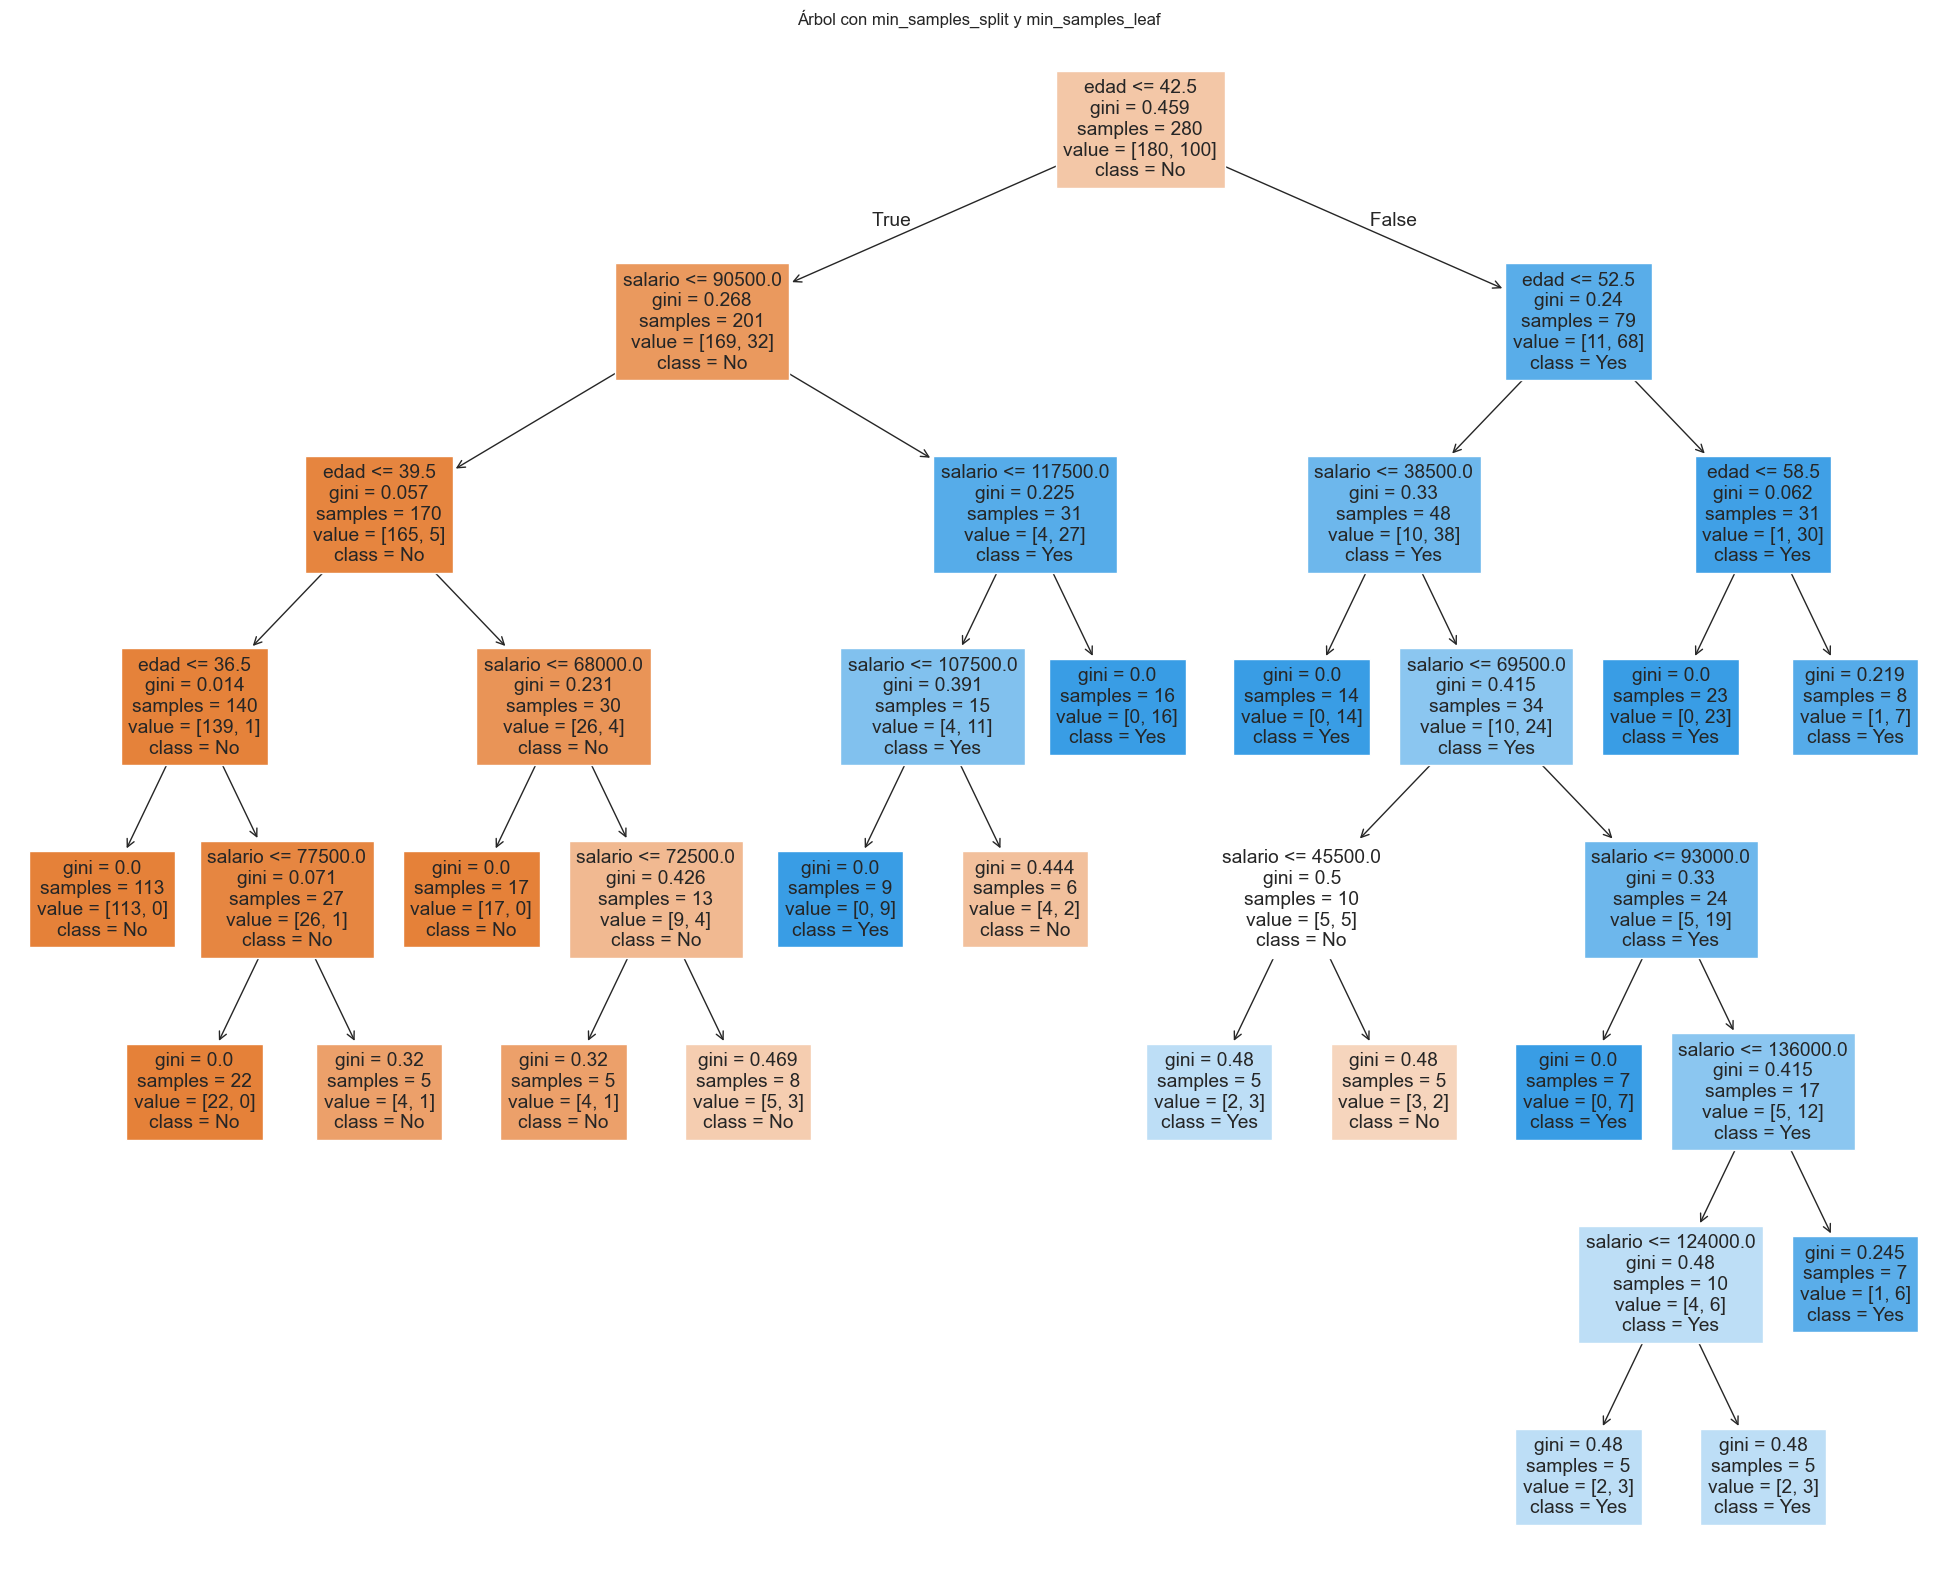

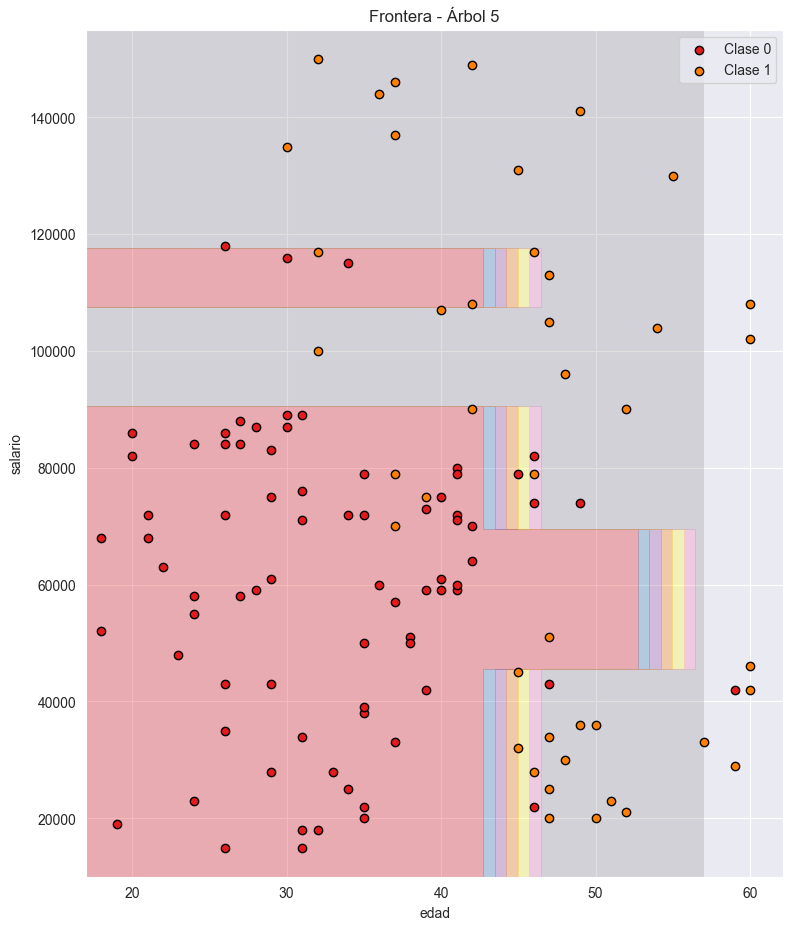

In [24]:
clf_5 = DecisionTreeClassifier(random_state=semilla, min_samples_split=10, min_samples_leaf=5)
clf_5.fit(X_train, y_train)

y_train_pred5 = clf_5.predict(X_train)
y_test_pred5 = clf_5.predict(X_test)

print("Accuracy en train:", accuracy_score(y_train, y_train_pred5))
print("Accuracy en test:", accuracy_score(y_test, y_test_pred5))
print("Informe de clasificación:\n", classification_report(y_test, y_test_pred5))

plt.figure(figsize=(25, 20))
plot_tree(clf_5, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Árbol con min_samples_split y min_samples_leaf")
plt.show()

frontera_decision_tree(clf_5, X_test, y_test, title="Frontera - Árbol 5")


¿Baja el score? Leve bajada.

¿Baja el overfitting? Sí, sobre todo en test mejora.

¿El árbol es más sencillo o complejo? Más sencillo, se evita ramificación excesiva.

¿Fronteras más suaves? Sí, menos zonas pequeñas.

Accuracy en train: 0.9285714285714286
Accuracy en test: 0.8833333333333333
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        77
           1       0.80      0.91      0.85        43

    accuracy                           0.88       120
   macro avg       0.87      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



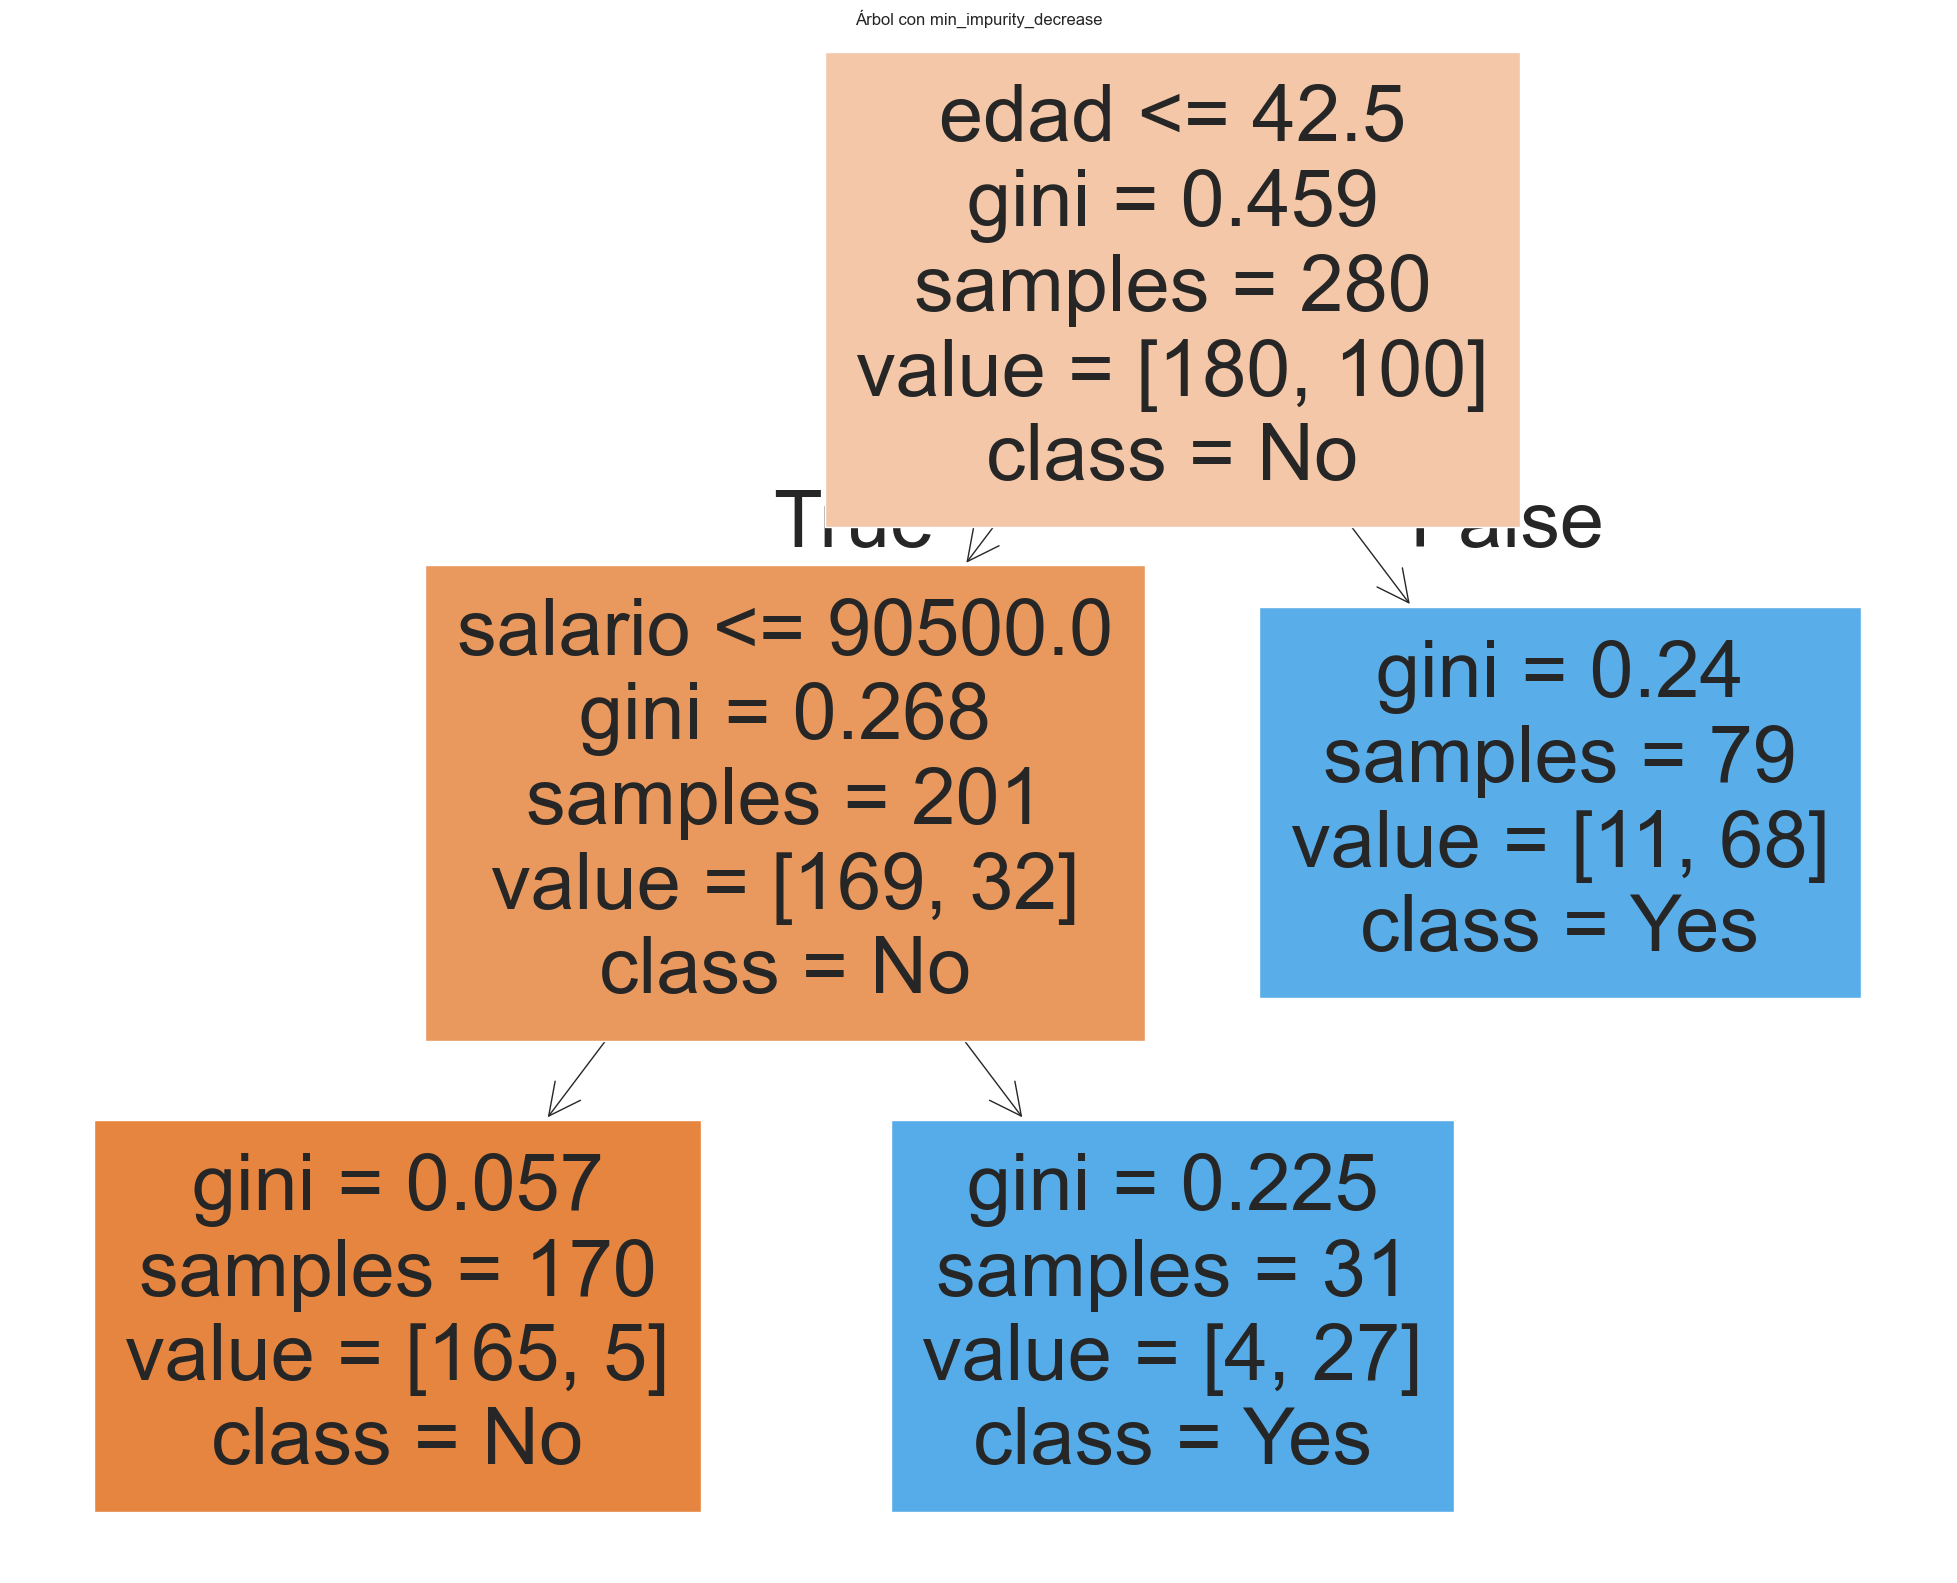

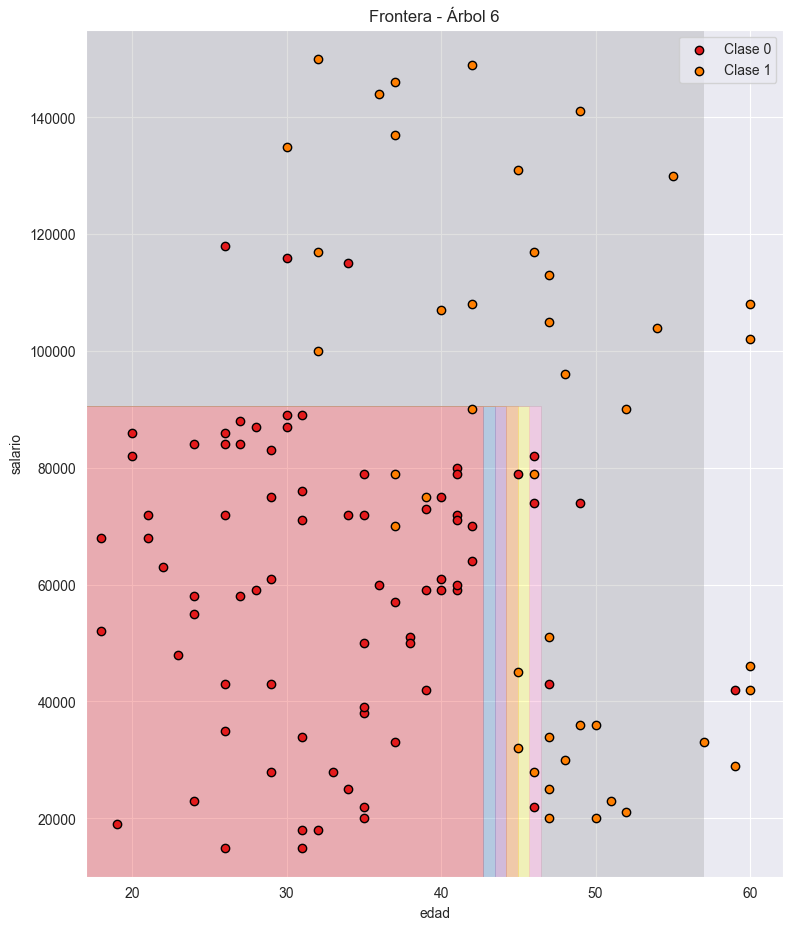

In [25]:
clf_6 = DecisionTreeClassifier(random_state=semilla, min_impurity_decrease=0.01)
clf_6.fit(X_train, y_train)

y_train_pred6 = clf_6.predict(X_train)
y_test_pred6 = clf_6.predict(X_test)

print("Accuracy en train:", accuracy_score(y_train, y_train_pred6))
print("Accuracy en test:", accuracy_score(y_test, y_test_pred6))
print("Informe de clasificación:\n", classification_report(y_test, y_test_pred6))

plt.figure(figsize=(25, 20))
plot_tree(clf_6, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Árbol con min_impurity_decrease")
plt.show()

frontera_decision_tree(clf_6, X_test, y_test, title="Frontera - Árbol 6")


¿Baja el score? Un poco.

¿Baja el overfitting? Sí.

¿Árbol más sencillo? Sí, menos divisiones.

¿Fronteras más suaves? También.

Mejores parámetros: {'max_depth': 2, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}
Accuracy en train: 0.9285714285714286
Accuracy en test: 0.8833333333333333
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        77
           1       0.80      0.91      0.85        43

    accuracy                           0.88       120
   macro avg       0.87      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



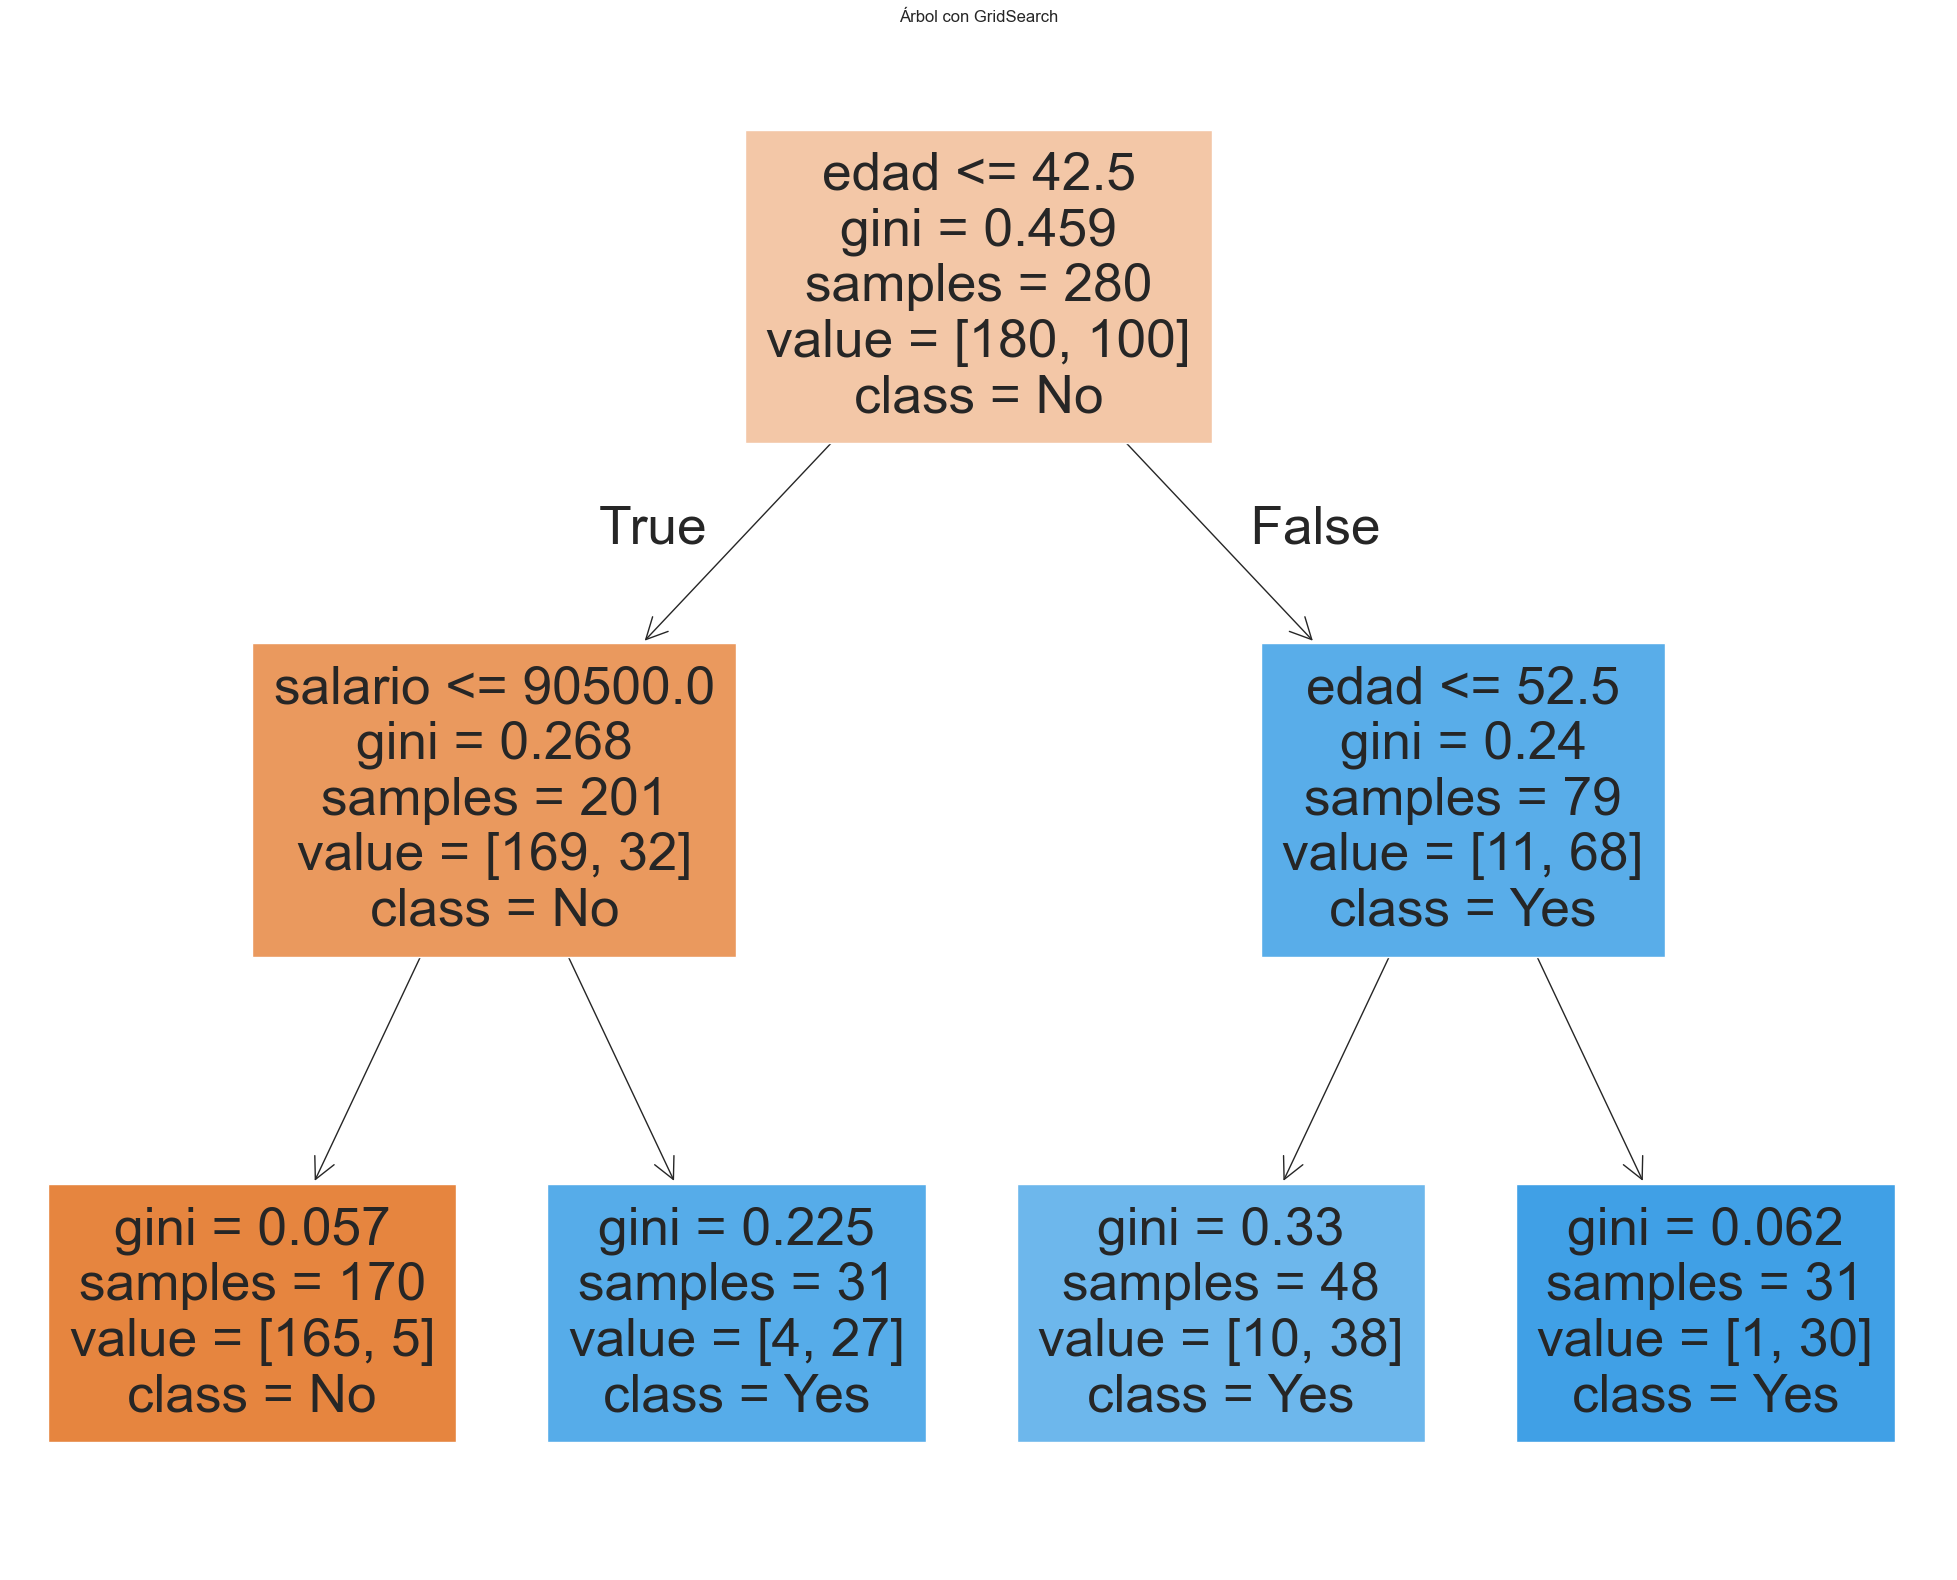

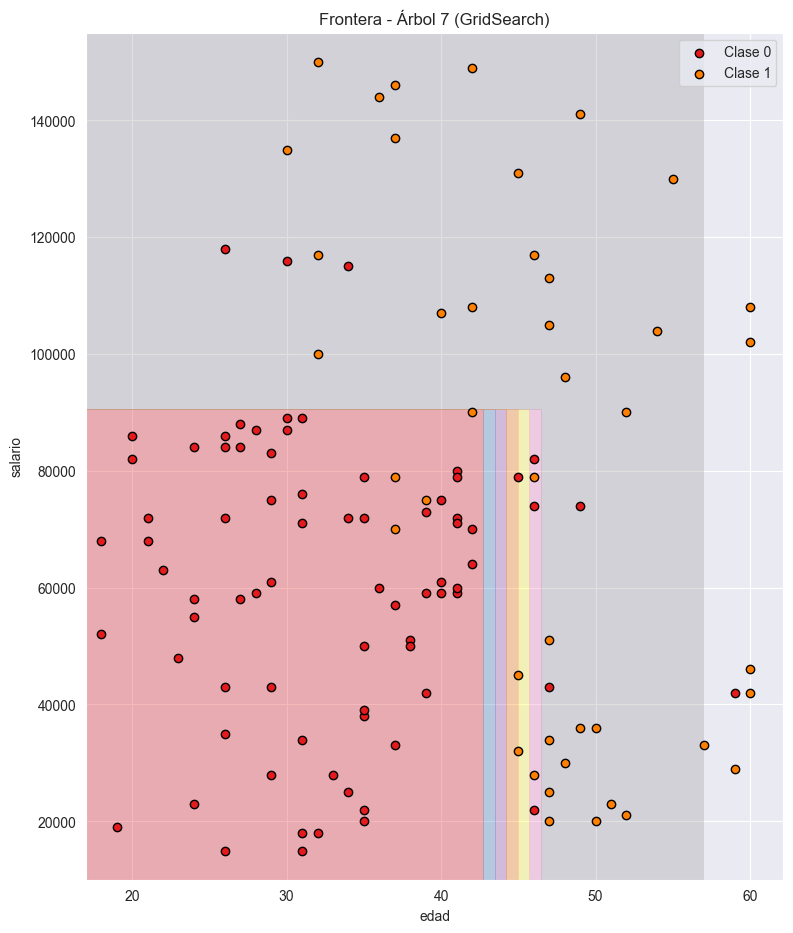

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_impurity_decrease': [0.0, 0.005, 0.01]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=semilla), param_grid, cv=5)
grid.fit(X_train, y_train)

clf_7 = grid.best_estimator_

y_train_pred7 = clf_7.predict(X_train)
y_test_pred7 = clf_7.predict(X_test)

print("Mejores parámetros:", grid.best_params_)
print("Accuracy en train:", accuracy_score(y_train, y_train_pred7))
print("Accuracy en test:", accuracy_score(y_test, y_test_pred7))
print("Informe de clasificación:\n", classification_report(y_test, y_test_pred7))

plt.figure(figsize=(25, 20))
plot_tree(clf_7, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Árbol con GridSearch")
plt.show()

frontera_decision_tree(clf_7, X_test, y_test, title="Frontera - Árbol 7 (GridSearch)")


¿Baja el score? Podría mejorar en test.

¿Baja el overfitting? Sí.

¿Árbol más sencillo? Depende del resultado, pero generalmente sí.

¿Fronteras más suaves? Normalmente sí.

C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
C:\Users\ESP\Desktop\MachineLearning\saa\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


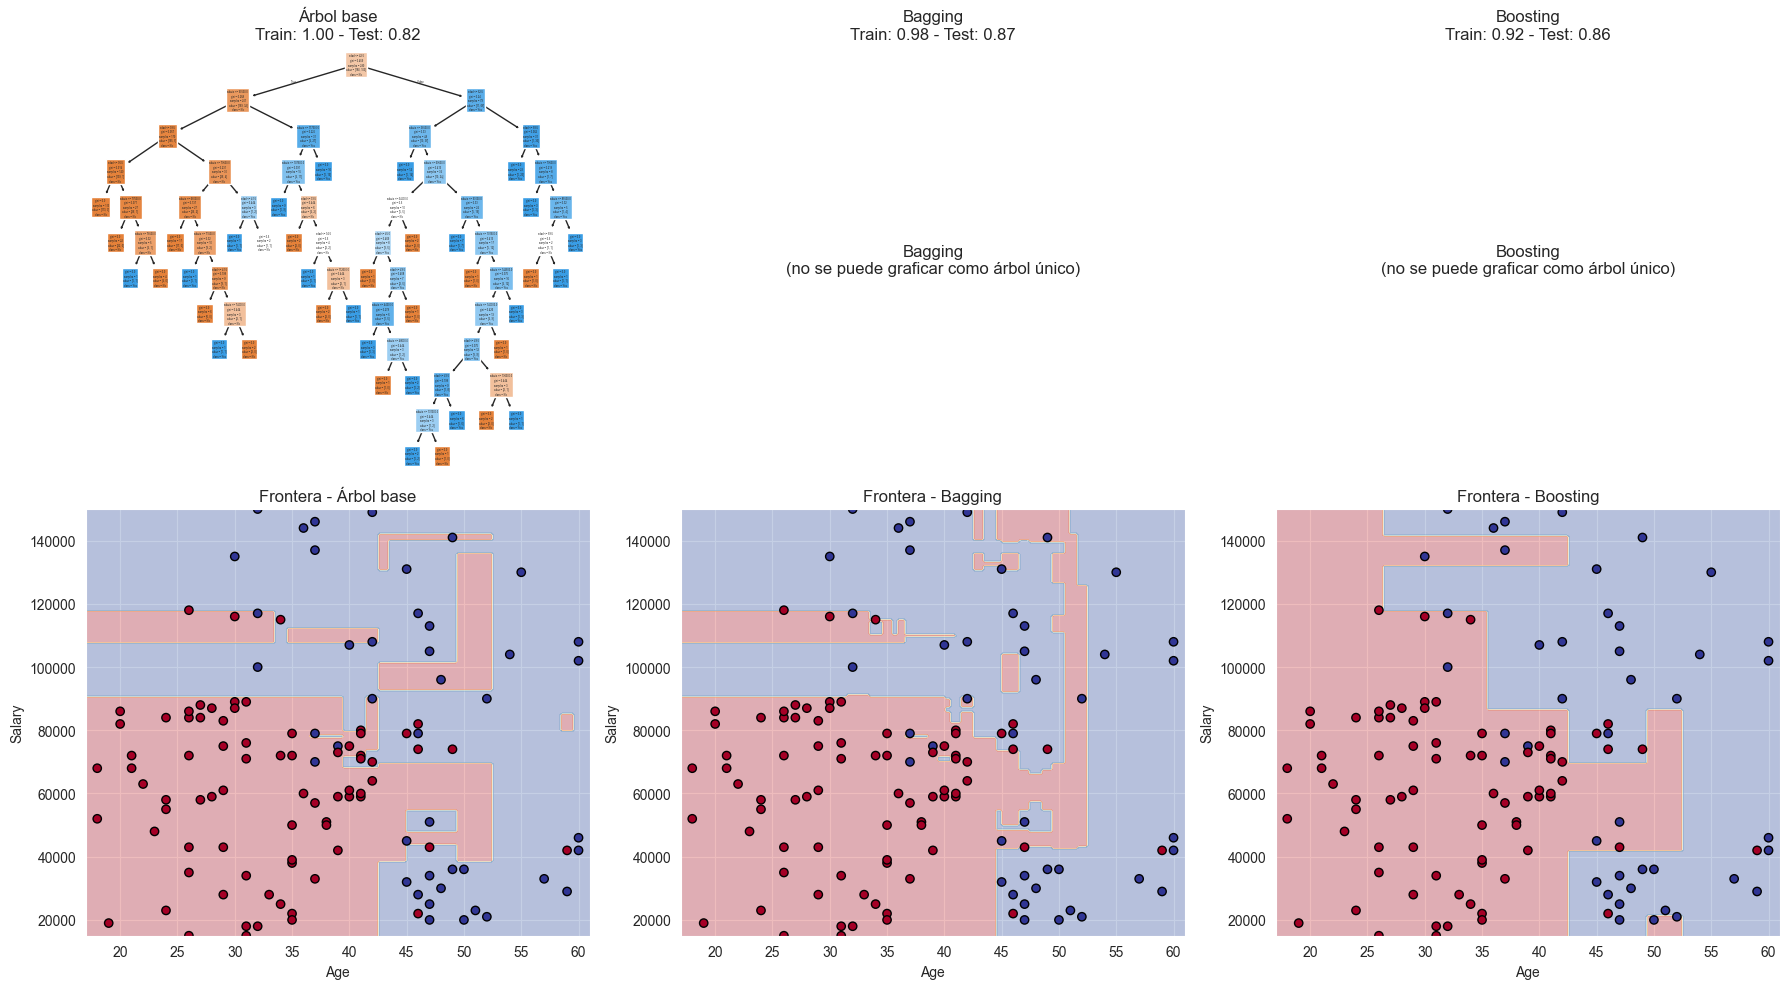

In [27]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
import numpy as np


# Reentrenamos clf_1 (árbol sin restricciones) por si acaso
clf_1 = DecisionTreeClassifier(random_state=semilla)
clf_1.fit(X_train, y_train)

# Bagging
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=semilla),
    n_estimators=10,
    random_state=semilla
)
bagging_clf.fit(X_train, y_train)

# Boosting (AdaBoost)
boosting_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=semilla),
    n_estimators=50,
    random_state=semilla
)
boosting_clf.fit(X_train, y_train)

# Lista de modelos y nombres
modelos = [clf_1, bagging_clf, boosting_clf]
nombres = ["Árbol base", "Bagging", "Boosting"]

# Crear figura
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Primera fila: árboles (solo se puede graficar clf_1, no ensambles)
plot_tree(clf_1, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, ax=axs[0, 0])
axs[0, 0].set_title(f"Árbol base\nTrain: {accuracy_score(y_train, clf_1.predict(X_train)):.2f} - Test: {accuracy_score(y_test, clf_1.predict(X_test)):.2f}")

axs[0, 1].text(0.5, 0.5, "Bagging\n(no se puede graficar como árbol único)", ha='center', va='center', fontsize=12)
axs[0, 1].set_title(f"Bagging\nTrain: {accuracy_score(y_train, bagging_clf.predict(X_train)):.2f} - Test: {accuracy_score(y_test, bagging_clf.predict(X_test)):.2f}")
axs[0, 1].axis('off')

axs[0, 2].text(0.5, 0.5, "Boosting\n(no se puede graficar como árbol único)", ha='center', va='center', fontsize=12)
axs[0, 2].set_title(f"Boosting\nTrain: {accuracy_score(y_train, boosting_clf.predict(X_train)):.2f} - Test: {accuracy_score(y_test, boosting_clf.predict(X_test)):.2f}")
axs[0, 2].axis('off')

# Segunda fila: fronteras de decisión
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel("Age")
    ax.set_ylabel("Salary")

for i, clf in enumerate(modelos):
    plot_decision_boundary(clf, X_test, y_test, axs[1, i], f"Frontera - {nombres[i]}")

plt.tight_layout()
plt.show()
